<a href="https://www.kaggle.com/sakinkirti/simplenn-pneumoniaclassification?scriptVersionId=83716867" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# NN to classify chest x-rays as having pnuemonia or normal
Uses dataset from 2018 published in cell: https://data.mendeley.com/datasets/rscbjbr9sj/2 <br>
Total training dataset size: 2698 of prebalanced samples (1349 normal/1349 pneumonia) <br>
Total testing dataset size: 468 of prebalanced samples (234 normal/234 pneumonia) <br>
This equates to a 17/83 train/test split which is a fairly good split to understand the accuracy of the model

## Table of Contents
- [1 - Import the packages](#1)
- [2 - Load the images](#2)
- [3 - Creating the helper functions](#3)
    - [3.1 - initializeParameters](#3-1)
    - [3.2 - modelForward](#3-2)
    - [3.3 - computeCost](#3-3)
    - [3.4 - modelBackward](#3-4)
    - [3.5 - updateParameters](#3-5)
- [4 - One function which assembles the component functions](#4)
- [5 - A function to calculate the predictions](#5)
- [6 - Training the model](#6)
- [7 - Testing the model](#7)

<a name='1'></a>
## Section 1 - Import necessary packages

In [1]:
# for data manipulation
import numpy as np
import pandas as pd

# for image loading
from PIL import Image, ImageOps
import glob
import random

# for creating visualizations
import matplotlib.pyplot as plt

<a name='2'></a>
## Section 2 - Load the images
1. create function to load the images from the folders
2. call the function to load the data
3. test by opening some images in each of the datasets

<a name='2-1'></a>
### Create the function to load the images from each folder
- images are stored in different folders
- iterate through each folder
- place each image in the right list
- place its corresponding class in the output list
- randomize the orders of the testing and training sets

In [2]:
# function to load the data sets
def loadData(normalTrain, pnuemoTrain, normalTest, pneumoTest):
    
    # load the training data details
    trainXImg = []
    trainY = []
    for file in glob.glob(normalTrain):
        img = Image.open(file)
        img = ImageOps.grayscale(img)
        img.thumbnail((720, 720))
        # crop to the center of the image
        width, height = img.size
        left = (width - 720)/2
        top = (height - 720)/2
        right = (width + 720)/2
        bottom = (height + 720)/2
        img = img.crop((left, top, right, bottom))
        # save the image to the array
        trainXImg.append(np.asarray(img))
        img.close()
        trainY.append(0)
    print("finished loading normal training images")
    for file in glob.glob(pneumoTrain):
        img = Image.open(file)
        img = ImageOps.grayscale(img)
        img.thumbnail((720, 720))
        # crop to the center of the image
        width, height = img.size
        left = (width - 720)/2
        top = (height - 720)/2
        right = (width + 720)/2
        bottom = (height + 720)/2
        img = img.crop((left, top, right, bottom))
        # save the image to the array
        trainXImg.append(np.asarray(img))
        img.close()
        trainY.append(1)
    print("finished loading pneumonia training images")

    # load the testing data details
    testXImg = []
    testY = []
    for file in glob.glob(normalTest):
        img = Image.open(file)
        img = ImageOps.grayscale(img)
        img.thumbnail((720, 720))
        # crop to the center of the image
        width, height = img.size
        left = (width - 720)/2
        top = (height - 720)/2
        right = (width + 720)/2
        bottom = (height + 720)/2
        img = img.crop((left, top, right, bottom))
        # save the image to the array
        testXImg.append(np.asarray(img))
        img.close()
        testY.append(0)
    print("finished loading normal testing images")
    for file in glob.glob(pneumoTest):
        img = Image.open(file)
        img = ImageOps.grayscale(img)
        img.thumbnail((720, 720))
        # crop to the center of the image
        width, height = img.size
        left = (width - 720)/2
        top = (height - 720)/2
        right = (width + 720)/2
        bottom = (height + 720)/2
        img = img.crop((left, top, right, bottom))
        # save the image to the array
        testXImg.append(np.asarray(img))
        img.close()
        testY.append(1)
    print("finished loading pneumonia testing images")
    
    return np.asarray(trainXImg), np.asarray(trainY), np.asarray(testXImg), np.asarray(testY)

<a name='2-2'></a>
### Call the function to load the images and data
- store the filepaths
- call the function and save the outputs

In [3]:
# get the folders of the images for training and testing sets
normalTrain = "../input/chest-xray-pneumonia/chest_xray/train/NORMAL/*.jpeg"
pneumoTrain = "../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA*.jpeg"
normalTest = "../input/chest-xray-pneumonia/chest_xray/test/NORMAL/*.jpeg"
pneumoTest = "../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA*.jpeg"

# call the function
trainXImg, trainY, testXImg, testY = loadData(normalTrain, pneumoTrain, normalTest, pneumoTest)

finished loading normal training images
finished loading pneumonia training images
finished loading normal testing images
finished loading pneumonia testing images


In [4]:
# flatten the images so they are single dimensional arrays
trainXFlat = trainXImg.flatten().reshape(518400, -1)
testXFlat = testXImg.flatten().reshape(518400, -1)
trainY = trainY.reshape(1, trainY.shape[0])
testY = testY.reshape(1, testY.shape[0])

# store the row dims of Xtrain and Xtest for training and testing dataset
trainXVec = trainXFlat.shape[0]
testXVec = testXFlat.shape[0]

# reassign to better named vars
trainX = trainXFlat
testX = testXFlat

In [5]:
m_train = trainXImg.shape[0]
m_test = testXImg.shape[0]
num_px = trainXImg[1].shape[0]

# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(trainXImg.shape))
print ("train_set_y shape: " + str(trainY.shape))
print ("test_set_x shape: " + str(testXImg.shape))
print ("test_set_y shape: " + str(testY.shape))

Number of training examples: m_train = 1341
Number of testing examples: m_test = 234
Height/Width of each image: num_px = 720
Each image is of size: (720, 720, 3)
train_set_x shape: (1341, 720, 720)
train_set_y shape: (1, 1341)
test_set_x shape: (234, 720, 720)
test_set_y shape: (1, 234)


In [6]:
print ("trainXFlat shape: " + str(trainXFlat.shape))
print ("trainY shape: " + str(trainY.shape))
print ("testXFlat shape: " + str(testXFlat.shape))
print ("testY shape: " + str(testY.shape))

trainXFlat shape: (518400, 1341)
trainY shape: (1, 1341)
testXFlat shape: (518400, 234)
testY shape: (1, 234)


<a name='2-3'></a>
### Test the function by getting some of the images and outputting their status

Either 0 (normal) or 1 (pneumonia): 0


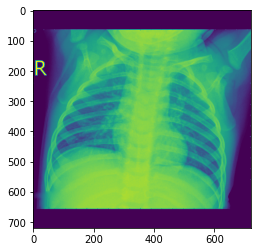

In [7]:
trainPlot = plt.imshow(trainXImg[32])
print("Either 0 (normal) or 1 (pneumonia): " + str(trainY[0][32]))

Either 0 (normal) or 1 (pneumonia): 0


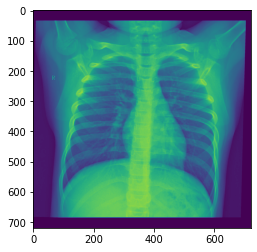

In [8]:
testPlot = plt.imshow(testXImg[64])
print("Either 0 (normal) or 1 (pneumonia): " + str(testY[0][64]))

<a name='3'></a>
## Section 3 - Create helper functions
1. initialize the parameters
2. model forward
3. Sigmoid activation function
3. ReLU activation function

<a name='3-1'></a>
### Intialize the parameters

In [9]:
def initParams(layerDims):
    params = {}
    L = len(layerDims)            # number of layers in the network

    for l in range(1, L):
        params['W' + str(l)] = np.random.randn(layerDims[l], layerDims[l-1]) * 0.01
        params['b' + str(l)] = np.zeros((layerDims[l], 1))
        
        assert(params['W' + str(l)].shape == (layerDims[l], layerDims[l-1]))
        assert(params['b' + str(l)].shape == (layerDims[l], 1))
        
    return params

<a name='3-2'></a>
### Model Forward

In [10]:
def modelForward(X, params):
    caches = []
    A = X
    L = len(params) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linearActivationForward(A_prev, params['W' + str(l)], params['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linearActivationForward(A, params['W' + str(L)], params['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

# sub-helper functions for modelForward
# performs the linear step
def linearForward(A, W, b):
    Z = W.dot(A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

# performs the activation step
def linearActivationForward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linearCache = linearForward(A_prev, W, b)
        A, activationCache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linearCache = linearForward(A_prev, W, b)
        A, activationCache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linearCache, activationCache)

    return A, cache

# computing the simple relu and sigmoid functions
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache
def relu(Z):
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

<a name='3-3'></a>
### Compute Cost

In [11]:
def computeCost(AL, Y):
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost 

<a name='3-4'></a>
### Model Backward

In [12]:
def modelBackward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    currentCache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linearActivationBackward(dAL, currentCache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        currentCache = caches[l]
        dA, dW, db = linearActivationBackward(grads["dA" + str(l + 1)], currentCache, activation = "relu")
        grads["dA" + str(l)] = dA
        grads["dW" + str(l + 1)] = dW
        grads["db" + str(l + 1)] = db

    return grads

# sub-helper functions
# calculates the linear backward step
def linearBackward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

# computes the backwards activation step
def linearActivationBackward(dA, cache, activation):
    linearCache, activationCache = cache
    
    if activation == "relu":
        dZ = reluBackward(dA, activationCache)
        dA_prev, dW, db = linearBackward(dZ, linearCache)
        
    elif activation == "sigmoid":
        dZ = sigmoidBackward(dA, activationCache)
        dA_prev, dW, db = linearBackward(dZ, linearCache)
    
    return dA_prev, dW, db

# computes the backwards relu and sigmoid derivatives
def reluBackward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ
def sigmoidBackward(dA, cache):
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ 

<a name='3-5'></a>
### Update parameters

In [13]:
def updateParams(params, grads, LR):
    L = len(params) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        params["W" + str(l+1)] = params["W" + str(l+1)] - LR * grads["dW" + str(l+1)]
        params["b" + str(l+1)] = params["b" + str(l+1)] - LR * grads["db" + str(l+1)]
        
    return params

<a name='4'></a>
## Section 4 - One function to rule them all
This function implements all of the previous helper functions to create the neural network by implementing gradient descent
- It performs forward propogation
- computes the cost function (how different y and yhat are)
- performs back propogation
- and updates the parameters to make the parameters closer to correct

In [14]:
def simpleNN(X, Y, layerDims, LR, numIters):
    
    # create vars to store some values
    np.random.seed(7)
    costs = []
    params = initParams(layerDims)
    
    # iterate through the number of iterations
    for i in range(0, numIters):
        
        # model forward
        Yhat, caches = modelForward(X, params)
        # compute the cost
        cost = computeCost(Yhat, Y)
        # model backward
        grads = modelBackward(Yhat, Y, caches)
        # update paramters
        params = updateParams(params, grads, LR)
        
        # print the cost
        print("cost after {} iterations: {}".format(i+1, np.squeeze(cost)))
        costs.append(cost)
            
    return params, costs

<a name='5'></a>
## Section 5 - Calculating predictions
Create a function to calculate the predictions

In [15]:
def predict(X, Y, params):
    
    m = X.shape[1]
    n = len(params) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probs, caches = modelForward(X, params)

    # convert probs to 0/1 predictions
    for i in range(0, probs.shape[1]):
        if probs[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("Accuracy: " + str(np.sum((p == Y)/m)))
        
    return p

<a name='6'></a>
## Section 6 - Training the model
- finalize the parameters and costs

In [16]:
# initialize the constants
layerDims = [trainXVec, 20, 7, 5, 1]
learningRate = 0.01
numIterations = 30

# call the training function
params, costs = simpleNN(trainX, trainY, layerDims, learningRate, numIterations)

cost after 1 iterations: 0.7001082737593758
cost after 2 iterations: 0.6923592739010513
cost after 3 iterations: 0.6889099193045674
cost after 4 iterations: 0.6860399076504446
cost after 5 iterations: 0.6833196694677455
cost after 6 iterations: 0.6806345531998956
cost after 7 iterations: 0.6779425651156494
cost after 8 iterations: 0.6752142934126031
cost after 9 iterations: 0.672392141803391
cost after 10 iterations: 0.6693712591602158
cost after 11 iterations: 0.6659418582770933
cost after 12 iterations: 0.6616190395574466
cost after 13 iterations: 0.6551325778666833
cost after 14 iterations: 0.6424173078527157
cost after 15 iterations: 0.6063808685281225
cost after 16 iterations: 0.4472081160125253
cost after 17 iterations: 0.010789465122394728
cost after 18 iterations: 0.003098628456871225
cost after 19 iterations: 0.001898269015038246
cost after 20 iterations: 0.001356116593172713
cost after 21 iterations: 0.001046822097115415
cost after 22 iterations: 0.000847484695869097
cost aft

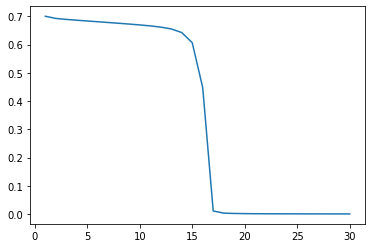

In [17]:
# graph the cost
iters = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
plt.plot(iters,costs)
plt.show()

<a name='7'></a>
## Section 7 - Testing the model
- First on the training data ~ hopefully around 0.99 Accuracy
- Then on the testing data

First, a sanity check by predicting the training data. The model should have already seen these images, so it should easily be able to predict these

In [18]:
trainPred = predict(trainX, trainY, params)

Accuracy: 1.0


Next, trying to predict the testing images

In [19]:
testPred = predict(testX, testY, params)

Accuracy: 0.9999999999999998
